<center><h1>Working with Beautiful Soup - 2</h1></center>

In [146]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import re
import matplotlib.pyplot as plt
from collections import defaultdict
from bs4.element import Tag
from typing import List

### 1. Web page:  https://www.vit.ac.in

In [2]:
URL = "https://www.vit.ac.in"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

#### a•	Print the “title” of the page

In [4]:
print(soup.title.string)

VIT | No.1 Private Institution for Innovation


#### b•	Print out all the anchor tags with the class = “nav-link”

In [8]:
nav_link_tags = soup.find_all("a", class_="nav-link")

In [9]:
len(nav_link_tags)

117

In [10]:
nav_link_tags

[<a class="nav-link vc-mm-mobile-toggle-btn" href="#"> Menu<i class="fa fa-bars"></i> </a>,
 <a class="nav-link vc-mm-mobile-toggle-btn" href="#"><i class="fa fa-bars"></i></a>,
 <a class="nav-link" href="https://vit.ac.in">Home</a>,
 <a class="nav-link" href="https://vit.ac.in/about-vit" title="About VIT">About Us</a>,
 <a class="nav-link" href="https://vit.ac.in/about-vit" title="Overview">Overview</a>,
 <a class="nav-link" href="https://vit.ac.in/about/vision-mission" title="Vision &amp; Mission">Vision &amp; Mission</a>,
 <a class="nav-link" href="https://vit.ac.in/vit-milestones" title="VIT Milestones">VIT Milestones</a>,
 <a class="nav-link" href="https://vit.ac.in/about/leadership" title="Leadership">Leadership</a>,
 <a class="nav-link" href="https://vit.ac.in/governance" title="Governance">Governance</a>,
 <a class="nav-link" href="https://vit.ac.in/about/administrative-offices" title="Administrative Offices">Administrative Offices</a>,
 <a class="nav-link" href="https://vit.ac

### 2. Web page:  https://vit.ac.in/school/allfaculty/site/computer-applications

In [11]:
URL = "https://vit.ac.in/school/allfaculty/site/computer-applications"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

#### a.	Print out all the faculty names using the class id “title2” and their research area by devising appropriate algorithm – you need to use methods of beautifulsoup

In [14]:
x=soup.find_all("div", class_="lightbox_course fancybox-content")

In [48]:
cnt=0
print("Name-Research Area")
for i in x:
    name = i.find("h3", class_="title2")
    tmp=i.find_all("div")
    if cnt>=12:
        print(name.string,"-NA")
    else:
        if len(tmp)!=0:
            print(name.string,"-",tmp[len(tmp)-1].p.string)
        else:
            print(name.string,"-NA")
    cnt+=1

Name-Research Area
Dr.Ramkumar T - Data Mining & Big Data Analytics
Dr.Ephzibah E.P - Data Mining and Artificial Intelligence 
Dr. Karthikeyan P - Cloud computing, Web Services
Dr.Manivannan S.S - Network and Information Security, IoT and Machine Learning 
Dr. Meenatchi S - Computer Science Hardware and Architecture
Dr.Senthil Murugan B -NA
Dr.Shynu P.G - Cloud computing, Information Security, Data Science
Dr. Uma Maheswari G - Computer Science Information Systems
Dr.Venketesh P -NA
Dr.Deepa N - Predictive Analytics
Dr.Jayalakshmi P - Networks
Dr. Senthil Kumar N - Semantic Web; Information Retrieval
Ms. Deepa P -NA
Ms. Manisha R. Patil -NA
Ms. Manjupriya R -NA
Mr. Ravindran U -NA
Mr.Sreeraag G -NA


#### b.	Find the facebook link, twitter link, instagram  linkand linkedin link of VIT from the page content and identify the class names given for each.

In [64]:
links=soup.find("span",class_="soclia_links").find_all("a")

In [79]:
print("Class - Link")
print("------------------")
for i in links:
    print(i.get("class")[0],i.get("class")[1]," - ",i.get("href"))

Class - Link
------------------
face_book_icon f_icon_be  -  https://www.facebook.com/VITuniversity/
twitter_icon f_icon_be  -  https://twitter.com/vit_univ
linkedin_icon f_icon_be  -  https://www.linkedin.com/school/vellore-institute-of-technology/
youbtube_icon f_icon_be  -  https://www.youtube.com/c/VITUniversityVellore
insta_icon f_icon_be  -  https://www.instagram.com/vellore_vit/


#### c.	List out the DOM hierarchy of the page [ Find all the children and the relationship between the children

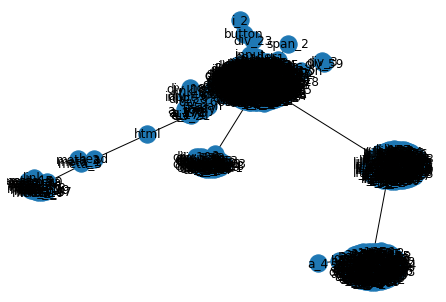

In [82]:
d = soup(page.content, 'html.parser')
def _traverse_html(_d:soup, _graph:nx.Graph, _counter, _parent=None) -> None:
  for i in _d.contents:
     if i.name is not None:
       try:
         _name_count = _counter.get(i.name)
         if _parent is not None:
           _graph.add_node(_parent)
           _graph.add_edge(_parent, i.name if not _name_count else f'{i.name}_{_name_count}')
         _counter[i.name] += 1
         _traverse_html(i, _graph, _counter, i.name)
       except AttributeError:
         pass

_full_graph = nx.Graph()
_traverse_html(d, _full_graph, defaultdict(int))
nx.draw(_full_graph, with_labels = True)   
plt.show()

### 3. Web page :  https://sermitsiaq.ag/english

In [95]:
url = "https://sermitsiaq.ag/english"
html_text = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}).text
soup = BeautifulSoup(html_text, 'html.parser')

#### a.	Find all the items of class=”menu” and print out the items of the menu with class names With class names “first leaf”, “leaf” and “last leaf”.

In [113]:
itemss = soup.find_all(class_="menu")

In [120]:
items = set()
for i in itemss:
    temp=i.find_all(class_="leaf")
    for j in temp:
        items.add(j.string)
    temp2=i.find_all(class_="first leaf")
    for j in temp2:
        items.add(j.string)
    temp3=i.find_all(class_="last leaf")
    for j in temp3:
        items.add(j.string)

print("Items with class as 'Leaf' , 'First Leaf', 'Last Leaf:'")
for i in items:
    print(i)

Items with class as 'Leaf' , 'First Leaf', 'Last Leaf:'
Indland
Nyhedsoversigt
E-aviser
Kultur
Forsiden
Pilivik
Nuuk
Erhverv
Politik
Job
Bestil foto
Abonnement
JOB
Annoncer
Udland
Kontakt
Politi
Sport


#### b.	Find all items with ids containing string “menu” in them

In [123]:
soup.find_all(id=re.compile('menu'))

[<button id="menuToggle"></button>,
 <div class="panel-pane pane-block pane-menu-menu-secondary-menu" id="secondarymenu">
 <ul class="menu"><li class="first leaf"><a href="/node/195195">Bestil foto</a></li>
 <li class="leaf"><a href="http://aviisi.sermitsiaq.ag/abonnementer/" target="_blank">Abonnement</a></li>
 <li class="leaf"><a href="/annoncer">Annoncer</a></li>
 <li class="leaf"><a href="/node/155045">Kontakt</a></li>
 <li class="leaf"><a href="http://aviisi.sermitsiaq.ag" target="_blank">E-aviser</a></li>
 <li class="leaf job-link"><a href="http://job.sermitsiaq.ag" target="_blank">JOB</a></li>
 <li class="last leaf"><a href="/pilivik">Pilivik</a></li>
 </ul> </div>,
 <div id="mainmenu">
 <nav class="mainmenu"><div class="panel-pane pane-block pane-system-main-menu">
 <ul class="menu"><li class="first leaf"><a href="/">Forsiden</a></li>
 <li class="leaf"><a class="menu-indland" href="/indland">Indland</a></li>
 <li class="leaf"><a href="/nuuk">Nuuk</a></li>
 <li class="leaf"><a c

#### c.Find all items with tag “article”.

In [129]:
soup.find_all("article")

[<article class="node node--article node--w615 node--article--w615" role="article">
 <h1>Arctic people concerned for the future </h1>
 </article>,
 <article class="node node--article node--w300 node--article--w300" role="article">
 <h1>Press release: Common Arctic search and rescue service agreed</h1>
 </article>,
 <article class="node node--article node--w300 node--article--w300" role="article">
 <h1>Address Kuupik Kleist Arctic Council 7 Meeting 2011</h1>
 </article>,
 <article class="node node--article node--w300 node--article--w300" role="article">
 <h1>Open letter sent to the Foreign Ministers of Canada, U.S., Norway, Denmark, Greenland and Russia</h1>
 </article>,
 <article class="node node--article node--w300 node--article--w300" role="article">
 <h1>Resource Development Principles in Inuit Nunaat</h1>
 </article>,
 <article class="node node--article node--w300 node--article--w300" role="article">
 <h1>Arctic Council Nuuk Ministerial Agenda</h1>
 </article>,
 <article class="nod

#### d.	List out the DOM hierarchy of the page

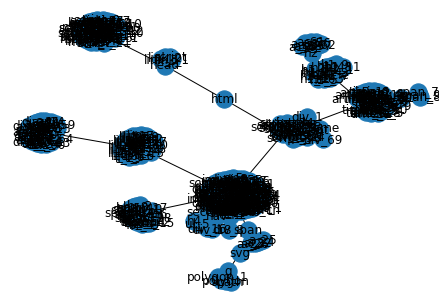

In [134]:
d = BeautifulSoup(html_text, 'html.parser')

def _traverse_html(_d:soup, _graph:nx.Graph, _counter, _parent=None) -> None:
  for i in _d.contents:
     if i.name is not None:
       try:
         _name_count = _counter.get(i.name)
         if _parent is not None:
           _graph.add_node(_parent)
           _graph.add_edge(_parent, i.name if not _name_count else f'{i.name}_{_name_count}')
         _counter[i.name] += 1
         _traverse_html(i, _graph, _counter, i.name)
       except AttributeError:
         pass

_full_graph = nx.Graph()
_traverse_html(d, _full_graph, defaultdict(int))
nx.draw(_full_graph, with_labels = True)   
plt.show()

### 4.	Take website :https://www.batimes.com.ar

In [135]:
URL = "https://www.batimes.com.ar"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

#### a.	List items of class “nav-item text-uppercase px-0”

In [136]:
soup.find_all(class_="nav-item text-uppercase px-0")

[<li class="nav-item text-uppercase px-0">
 <a class="px-0 nav-link" href="/last-news/" target="_self" title="Topics of the day">
 Topics
 </a>
 </li>,
 <li class="nav-item text-uppercase px-0">
 <a class="px-0 nav-link" href="/news/argentina/president-fernandez-under-fire-for-olivos-birthday-party-during-lockdown.phtml" target="_self" title="President Fernández under fire for Olivos birthday party during lockdown">
 Olivos party
 </a>
 </li>,
 <li class="nav-item text-uppercase px-0">
 <a class="px-0 nav-link" href="/news/sports/messis-hunger-for-more-means-star-is-sure-to-shine-in-city-of-lights.phtml" target="_self" title="Messi’s hunger for more means star is sure to shine in City of Lights">
 Messi moves to Paris
 </a>
 </li>,
 <li class="nav-item text-uppercase px-0">
 <a class="px-0 nav-link" href="/news/argentina/matias-kulfas-to-lower-inflation-you-need-multi-sector-agreements-and-clear-objectives.phtml" target="_self" title="Matías Kulfas: ‘To lower inflation you need multi-s

#### b.	Search for string “Matías Lammens” and list out the HTML item of in which the string occurs

In [149]:
result: List[Tag] = BeautifulSoup(page.content, 'lxml').select(
    'tr td strong:contains("Matías Lammens")'
    )
print(result)

[]


#### c.	List all the images in the page

In [151]:
soup.find_all("img")

[<img alt="Perfil" src="https://www.batimes.com.ar/img/logo_perfil.svg"/>,
 <img alt="Buenos Aires Times" src="https://www.batimes.com.ar/img/logo.svg"/>,
 <img alt="President Alberto Fernandez, pictured at a campaign event on Friday." class="img-fluid lazyload" data-sizes="1140" data-srcset="https://fotos.perfil.com/2021/08/27/trim/270/152/president-alberto-fernandez-stock-1222979.jpg 270w,https://fotos.perfil.com/2021/08/27/trim/540/304/president-alberto-fernandez-stock-1222979.jpg 540w,https://fotos.perfil.com/2021/08/27/trim/720/405/president-alberto-fernandez-stock-1222979.jpg 720w,https://fotos.perfil.com/2021/08/27/trim/720/355/president-alberto-fernandez-stock-1222979.jpg 720w,https://fotos.perfil.com/2021/08/27/trim/960/540/president-alberto-fernandez-stock-1222979.jpg 960w,https://fotos.perfil.com/2021/08/27/trim/1140/641/president-alberto-fernandez-stock-1222979.jpg 1140w,https://fotos.perfil.com/2021/08/27/trim/1140/540/president-alberto-fernandez-stock-1222979.jpg 1140w," 

In [152]:
len(soup.find_all("img"))

94

#### d.	List out the DOM hierarchy of the page

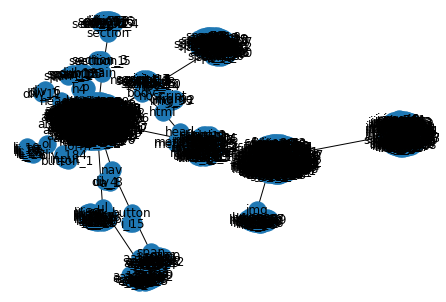

In [153]:
d = BeautifulSoup(page.content, 'html.parser')

def _traverse_html(_d:soup, _graph:nx.Graph, _counter, _parent=None) -> None:
  for i in _d.contents:
     if i.name is not None:
       try:
         _name_count = _counter.get(i.name)
         if _parent is not None:
           _graph.add_node(_parent)
           _graph.add_edge(_parent, i.name if not _name_count else f'{i.name}_{_name_count}')
         _counter[i.name] += 1
         _traverse_html(i, _graph, _counter, i.name)
       except AttributeError:
         pass

_full_graph = nx.Graph()
_traverse_html(d, _full_graph, defaultdict(int))
nx.draw(_full_graph, with_labels = True)   
plt.show()